In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import *

In [171]:
data=pd.read_excel("Marketing_Campaign_Data_5000.xlsx")
data=pd.DataFrame(data)
data.head()


,Customer ID,Age,Income (in $K),Spending Score (1-100),Gender,Married,Children,Promotion Response,Buy or Not Buy,Product Category Preference
0,1,56,54,70,Female,No,0,Yes,Buy,Home Appliances
1,2,46,97,97,Female,No,0,No,Buy,Cosmetics
2,3,32,90,55,Female,No,2,Yes,Buy,Cosmetics
3,4,60,58,1,Male,No,0,Yes,Not Buy,Apparel
4,5,25,48,70,Female,No,3,No,Not Buy,Apparel


In [172]:
# remove the customer ID as it add nothing to the analysis
data=data.drop(columns=['Customer ID'])
data=data.iloc[:,:].values
data

array([[56, 54, 70, ..., 'Yes', 'Buy', 'Home Appliances'],
       [46, 97, 97, ..., 'No', 'Buy', 'Cosmetics'],
       [32, 90, 55, ..., 'Yes', 'Buy', 'Cosmetics'],
       ...,
       [38, 67, 29, ..., 'Yes', 'Not Buy', 'Cosmetics'],
       [27, 32, 78, ..., 'No', 'Buy', 'Apparel'],
       [36, 113, 4, ..., 'No', 'Not Buy', 'Electronics']], dtype=object)

In [173]:
#encode catagory variables
labelencoder=LabelEncoder()
#encoding gender 
data[:,3]=labelencoder.fit_transform(data[:,3])
#female=0, male=1
category_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(category_mapping)

{'Female': np.int64(0), 'Male': np.int64(1)}


In [174]:
#encode martial status
data[:,4]=labelencoder.fit_transform(data[:,4])
#married=1, notmarried=0
category_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(category_mapping)

{'No': np.int64(0), 'Yes': np.int64(1)}


In [175]:
#encode promotion response 
data[:,6]=labelencoder.fit_transform(data[:,6])
#no=0,yes=1
category_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(category_mapping)

{'No': np.int64(0), 'Yes': np.int64(1)}


In [176]:
#encode buy or not buy
data[:,7]=labelencoder.fit_transform(data[:,7])
#buy=0, not buy=1
category_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(category_mapping)

{'Buy': np.int64(0), 'Not Buy': np.int64(1)}


In [177]:
#encode product catagory preferences
data[:,8]=labelencoder.fit_transform(data[:,8])

category_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(category_mapping)

{'Apparel': np.int64(0), 'Cosmetics': np.int64(1), 'Electronics': np.int64(2), 'Home Appliances': np.int64(3)}


In [178]:
df=pd.DataFrame(data,columns=[ 'Age', 'Income (in $K)', 'Spending Score (1-100)',
       'Gender', 'Married', 'Children', 'Promotion Response', 'Buy or Not Buy',
       'Product Category Preference'])

df.head()

,Age,Income (in $K),Spending Score (1-100),Gender,Married,Children,Promotion Response,Buy or Not Buy,Product Category Preference
0,56,54,70,0,0,0,1,0,3
1,46,97,97,0,0,0,0,0,1
2,32,90,55,0,0,2,1,0,1
3,60,58,1,1,0,0,1,1,0
4,25,48,70,0,0,3,0,1,0


# Individual trait analysis for Income, age, martial status and spending score

# Martial Status

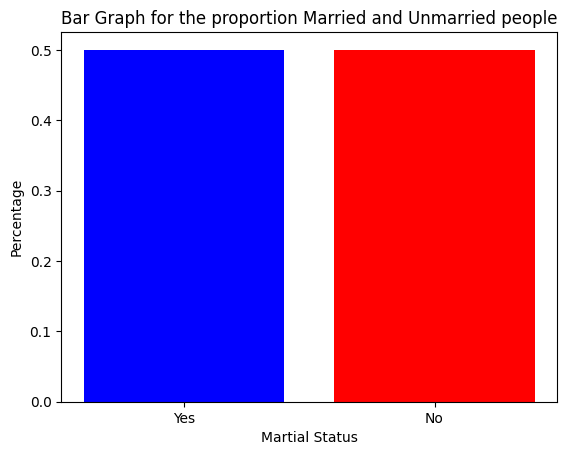

In [179]:

# Extract the 'martial_status' column
martial_status = data[:, 4]

# Convert to a pandas Series for easier counting
martial_status_series = pd.Series(martial_status)

# Count the occurrences of each unique value
martial_status_counts = martial_status_series.value_counts()

# Calculate the proportions
martial_status_proportions = martial_status_counts / martial_status_counts.sum()

# Create a mapping for the encoded values to "Yes" and "No"
category_mapping = {0: 'No', 1: 'Yes'}

# Map the encoded values to "Yes" and "No"
martial_status_proportions.index = martial_status_proportions.index.map(category_mapping)

# Define colors for each category
colors = ['red' if x == 'No' else 'blue' for x in martial_status_proportions.index]

# Plot the bar graph
plt.bar(martial_status_proportions.index, martial_status_proportions.values, color=colors, label="Proportion of Martial Status")
plt.xlabel('Martial Status')
plt.ylabel('Percentage')
plt.title(label='Bar Graph for the proportion Married and Unmarried people')
plt.show()

# Spending Score Distribution

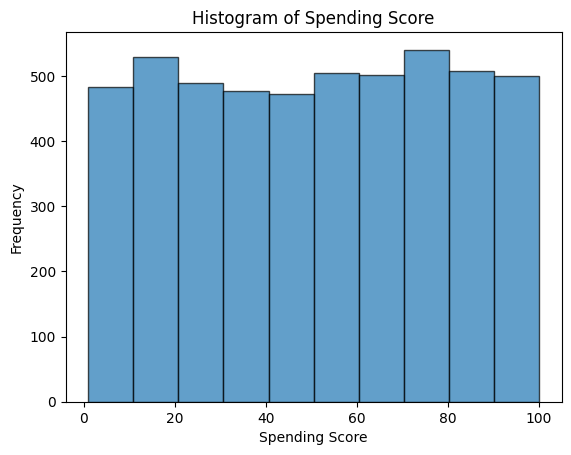

In [180]:
spending_score = data[:, 2]  
spending_score_series = pd.Series(spending_score)

plt.hist(spending_score_series, edgecolor='black', alpha=0.7)
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.title('Histogram of Spending Score')
plt.show()

# Income Distribution

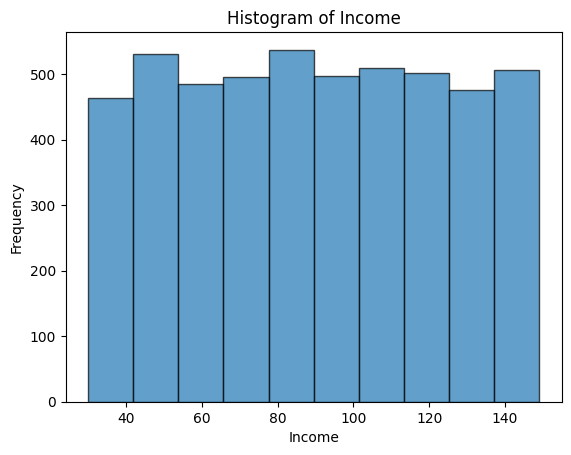

In [181]:
income=data[:,1]

income=pd.Series(income)

plt.hist(income, edgecolor='black', alpha=0.7)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

# Age Distibution

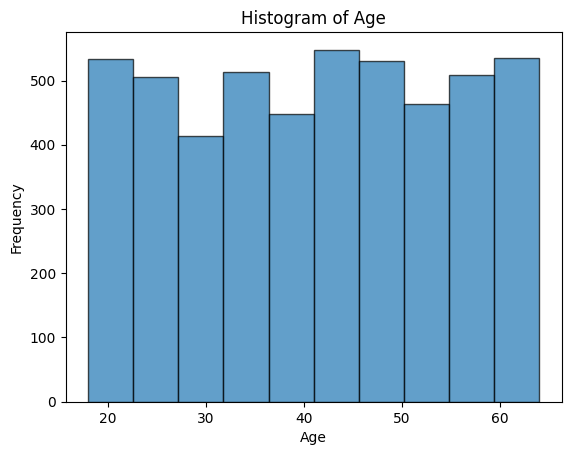

In [182]:
# Extract the 'age' column (replace 0 with the actual index of the 'age' column if needed)
age = data[:, 0]  # Assuming 'data' is a NumPy array and 'age' is at index 0

# Convert to a pandas Series for easier plotting
age_series = pd.Series(age)

# Plot the histogram
plt.hist(age_series, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Gender

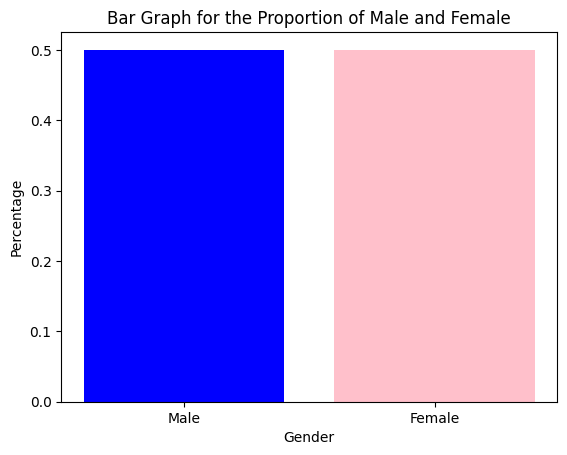

In [183]:


# Assuming 'data' is a NumPy array loaded from your dataset
# Extract the 'gender' column
gender = data[:, 4]  # Replace 4 with the actual index of the 'gender' column if needed

# Convert to a pandas Series for easier counting
gender_series = pd.Series(gender)

# Count the occurrences of each unique value
gender_counts = gender_series.value_counts()

# Calculate the proportions
gender_proportions = gender_counts / gender_counts.sum()

# Create a mapping for the encoded values to "Male" and "Female"
category_mapping = {0: 'Female', 1: 'Male'}  # Adjust the mapping according to your dataset

# Map the encoded values to "Male" and "Female"
gender_proportions.index = gender_proportions.index.map(category_mapping)

# Define colors for each category
colors = ['blue' if x == 'Male' else 'pink' for x in gender_proportions.index]

# Plot the bar graph
plt.bar(gender_proportions.index, gender_proportions.values, color=colors, label="Proportion of Gender")
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Bar Graph for the Proportion of Male and Female')
plt.show()